<a href="https://colab.research.google.com/github/zihadbappy/bnfake/blob/main/Md_Gulz_mBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq wandb


     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 158 kB 63.7 MB/s 
     |████████████████████████████████| 181 kB 67.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 157 kB 72.9 MB/s 
     |████████████████████████████████| 157 kB 66.7 MB/s 
     |████████████████████████████████| 157 kB 77.8 MB/s 
     |████████████████████████████████| 157 kB 75.0 MB/s 
     |████████████████████████████████| 157 kB 74.1 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 78.2 MB/s 
     |████████████████████████████████| 156 kB 72.7 MB/s 


In [ ]:
import wandb


In [ ]:
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:

wandb.init(project="bn_fake_classification", entity="zihadbappy")

wandb: Currently logged in as: zihadbappy. Use `wandb login --relogin` to force relogin


In [ ]:
!git clone https://github.com/zihadbappy/FakeDatasets.git

Cloning into 'FakeDatasets'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
import pandas as pd
Dataset= pd.read_excel('/content/FakeDatasets/FinalData1.xlsx')

In [ ]:
df= Dataset.filter(['Title','Statement', 'Class'], axis=1)
df.loc[(df.Class=='Real'),'Class']=1
df.loc[(df.Class=='Fake'),'Class']=0

In [ ]:
df['Class']=df['Class'].astype('int')
df['Class'].dtypes

dtype('int64')

In [ ]:
df.columns=['headline', 'content', 'label']

In [ ]:
df.groupby('label').agg('count')

,headline,content
label,,
0,993,993
1,1548,1548


In [ ]:
df = df.drop_duplicates(subset='headline', keep="first")

In [ ]:
df.groupby('label').agg('count')

,headline,content
label,,
0,948,948
1,1545,1545


In [ ]:
df.headline.duplicated().sum()

0

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df=df.dropna()
df

,headline,content,label
0,"এক দিনে করোনায় মৃত্যু ১৫ জনের, নতুন শনাক্ত ২৬৬",\n\nদেশে করোনাভাইরাসে আক্রান্ত হয়ে গত ২৪ ঘণ্টা...,1
1,কোভিড-১৯-এর কাছে মানবজাতি হেরে গেল কেন?,\n\nদ্বিতীয় বিশ্বযুদ্ধের পর থেকে বিশ্বের প্রভু...,1
2,সত্যিকারের ম্যাজিক!,"\n\nবাড়ির পাশেই ভিক্টোরিয়া পার্ক, বিকেল হলেই স...",1
3,এই সঙ্গনিরোধকালে,\n\nবাইরে বেরোচ্ছি না বেশ কিছুদিন ধরে। বলা ভাল...,1
4,কী করছেন ঘরবন্দী লেখকেরা,\n\nসবার মতো লেখকেরাও এখন ঘরবন্দী। লেখকদের এই ...,1
...,...,...,...
2488,\nধারের টাকা না দেয়ায় জোরপূর্বক সোয়েটার পড়...,\n\n\n\n\n\n\n\nএবার রাজধানীতে ঘটলো আরেকটি চাঞ...,0
2489,\nশেষ বয়সে পক্ষী মারা খেলেন শফিক রেহমান\n,\n\n\n \n\nঅবশেষে বেরিয়ে এলো শফিক রেহমানের থল...,0
2490,\nরুনা লায়লার হাতে থাবড়া খেলেন ফেরদৌস\n,"\n\n\n\n\n\n\n\n ""ছোটকাল থেকে আমি আপনার ভক্ত। ...",0
2491,\nবাটে পেয়ে মুশফিককে সেদিন পিটিয়েছিলেন মুস্ত...,\n\n\n\n\nএবার বাটে পেয়ে মুশফিকুর রহিমকে মেরে...,0


In [ ]:
X=df.content
Y=df.label

In [ ]:
Y.value_counts()

1    1545
0     948
Name: label, dtype: int64

In [ ]:
X.shape


(2493,)

In [ ]:
!pip install -Uqq transformers datasets tqdm
!pip install -Uqq ohmeow-blurr

     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 365 kB 73.0 MB/s 
     |████████████████████████████████| 6.6 MB 64.9 MB/s 
     |████████████████████████████████| 120 kB 66.2 MB/s 
     |████████████████████████████████| 212 kB 69.2 MB/s 
     |████████████████████████████████| 115 kB 75.2 MB/s 
     |████████████████████████████████| 127 kB 76.5 MB/s 
     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 1.3 MB 44.6 MB/s 


In [ ]:
!pip install ohmeow-blurr -q

In [ ]:
from fastai.text.all import *
from fastai.callback.wandb import *


from blurr.text.data.all import *


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
from blurr.text.modeling.all import *

In [ ]:
from transformers import PreTrainedModel

In [ ]:
from blurr.text.modeling.core import BlearnerForSequenceClassification

In [ ]:
df['text']=df['content']

In [ ]:
df = df.drop(['headline','content'],axis=1)

In [ ]:
df.head()

,label,text
0,1,"\n\nদেশে করোনাভাইরাসে আক্রান্ত হয়ে গত ২৪ ঘণ্টায় ১৫ জন মারা গেছেন। একই সময় দেশে করোনায় আক্রান্ত ব্যক্তি শনাক্ত হয়েছেন ২৬৬ জন।\nদেশে করোনায় এক দিনে মৃত্যু এই সর্বোচ্চ। এ নিয়ে দেশে করোনায় মোট মারা গেছেন ৭৫ জন। আর মোট শনাক্তের সংখ্যা ১ হাজার ৮৩৮ জন। সুস্থ হয়েছেন ৯ জন। এ নিয়ে মোট সুস্থ হলেন ৫৮ জন।\nব্রিফিংয়ে বলা হয়, গত ২৪ ঘণ্টায় ২ হাজার ১৯০টি নমুনা পরীক্ষা করা হয়।\nএখন পর্যন্ত আক্রান্তের মধ্যে হাসপাতালে চিকিৎসা নিয়েছেন ৫০০ জনের বেশি। বাকিরা বাসায় বা কোয়ারেন্টিনে চিকিৎসা নিয়েছেন। আইসিইউ সাপোর্ট নিয়েছেন ২৭ জন।\nআজ বৃহস্পতিবার করোনাভাইরাস নিয়ে স্বাস্থ্য অধিদপ্তরের নিয়মিত অনলাইন ব্রিফিংয়ে এসব তথ্য ..."
1,1,"\n\nদ্বিতীয় বিশ্বযুদ্ধের পর থেকে বিশ্বের প্রভু হয়ে ওঠার প্রতিযোগিতায় আমেরিকা, চীন, রাশিয়া, জার্মানি, জাপান, দুই কোরিয়া, যুক্তরাজ্য ও ফ্রান্সের মতো দেশগুলো প্রথম, দ্বিতীয় ও তৃতীয় বিশ্বের সবচেয়ে মেধাবী মানুষগুলোকে নিজেদের দখলে নিয়ে তাদের ‘মানুষ মারার অস্ত্র’ তৈরির কাজে নিয়োজিত করেছে। পরমাণু বোমাকে পাশ কাটিয়ে নতুন কী কী বিধ্বংসী মারণাস্ত্র তৈরি করা যায়, সেই লক্ষ্যেই তাঁরা কাজ করে চলেছেন। কেমিক্যাল ওয়েপন ও ব্যাকটেরিয়া ওয়েপন তৈরির ক্ষেত্র ক্রমশ সংগোপনে সম্প্রসারিত হয়েছে।\nগত শতকের শেষ দশকে এসে সোভিয়েত ইউনিয়ন ভেঙে যাওয়ার পর গত তিরিশ বছরে বিশ্বের অস্ত্র প্রতিযোগিতা সংগোপনে বৃদ্ধি পেয়েছে। তবে ওই স..."
2,1,"\n\nবাড়ির পাশেই ভিক্টোরিয়া পার্ক, বিকেল হলেই সেখানে ক্যানভাসাররা আসে, ম্যাজিশিয়ানরা জাদু দেখায়। শীতের এক পড়ন্ত বিকেলের কথা আমি কখনো ভুলব না। পাড়ার বন্ধু ইকবালকে নিয়ে জাদু দেখার আশায় গিয়েছিলাম সেখানে। ছিপছিপে শরীরের এক ম্যাজিশিয়ান জাদুর সরঞ্জামের স্যুটকেস আর পিচ্চি এক চ্যালা নিয়ে মাত্র এসেছে। এর আগে কিংবা পরে কখনো তাকে দেখিনি। লোকজনের জমায়েত ভারী হলেই শুরু করবে তার তেলেসমাতি। কিন্তু অনেকক্ষণ অপেক্ষার পরও ভিড় বাড়ল না, স্যুটকেসের ওপর বসে হাই তুলল ম্যাজিশিয়ান।\n‘একটা ম্যাজিক দেখান না’, অস্থির হয়ে বলল ইকবাল।\n‘আরও মানুষ আসুক...’, জবাব দিল ম্যাজিশিয়ান।\n১০ মিনিট পর আবারও ইকবালের তাড়া। বয়সের তুলন..."
3,1,"\n\nবাইরে বেরোচ্ছি না বেশ কিছুদিন ধরে। বলা ভালো, বেরোতে পারছি না। করোনা নামের এক অদ্ভুত অচেনা শত্রু আকস্মিকভাবে ঢুকে পড়েছে আমাদের জীবনে। যুদ্ধ শুরু হয়ে গেছে বিশ্বজুড়ে। অসম যুদ্ধ। কারণ, শত্রুপক্ষ মারাত্মক শক্তিশালী, কিন্তু আমরা তাকে চিনি না। পাশাপাশি এ যুদ্ধের বাস্তবতায় নতুন নতুন সব শব্দ ঢুকে পড়ছে আমাদের নিত্যদিনের অভিধানে—করোনা, কোয়ারেন্টিন, আইসোলেশন, সোশ্যাল ডিসট্যান্সিং, লকডাউন ইত্যাদি। কোনো দিন যেসব শব্দ শুনিওনি, সেগুলো এসে এখন দখল করে নিয়েছে আমাদের, শুধু শব্দই নয় শব্দ-সংশ্লিষ্ট ঘটনার অভিজ্ঞতাও হচ্ছে। অভূতপূর্ব সেই অভিজ্ঞতা। \nবাংলাদেশেও লকডাউন শুরু হওয়ার পর (যদিও শব্দটি বলা হচ্ছে না) দ..."
4,1,"\n\nসবার মতো লেখকেরাও এখন ঘরবন্দী। লেখকদের এই ঘরবন্দী সময় কেমন কাটছে, অন্তর্জাল ঘেঁটে জানাচ্ছে শবনম জাবীন চৌধুরী\nপিটার মেঅন্য সবার মতো হোম কোয়ারেন্টিনেই ছিলেন ব্রিটিশ লেখক পিটার মে। এর মধ্যে হঠাৎ একদিন ‘করোনার তাণ্ডব ও লকডাউন নিয়ে কিছু লিখুন’ বলে পিটারের টুইটারে অনুরোধ জানান তাঁর এক ভক্ত। ভক্তের এমন অনুরোধে প্রায় পনেরো বছর আগের একটি ঘটনা মনে পড়ে পিটারের। সেই ২০০৫ সালে মহামারি–আতঙ্ক নিয়ে একটি উপন্যাস লিখেছিলেন তিনি। কিন্তু উপন্যাসটি ছাপতে রাজি হননি কোনো প্রকাশক। সেই উপন্যাসের কথা আবার মনে পড়ে পিটার মের। তিনি সঙ্গে সঙ্গে যোগাযোগ করেন ওই প্রকাশকের সঙ্গে। প্রকাশক এক রাতের মধ্যে পাণ্ডুলিপিটি প..."


In [ ]:
pretrained_model_name = "bert-base-multilingual-cased"
learn = BlearnerForSequenceClassification.from_data(df, pretrained_model_name, dl_kwargs={ 'bs': 4})

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

SuggestedLRs(minimum=0.0015848932787775993, steep=0.013182567432522774, valley=0.0020892962347716093, slide=0.002511886414140463)

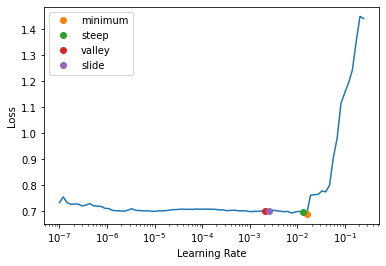

In [ ]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [ ]:
#learn.unfreeze()
learn.fit_one_cycle(10, lr_max=1e-3,cbs=[WandbCallback(log_preds=False, log_model=False)])

Could not gather input dimensions


epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.345870,0.214424,0.939490,0.923695,02:34
1,0.179698,0.234606,0.932886,0.919679,02:45
2,0.086605,0.091022,0.979592,0.973896,02:49
3,0.091821,0.052819,0.987382,0.983936,02:48
4,0.057738,0.043664,0.987220,0.983936,02:49
5,0.029601,0.057507,0.985692,0.981928,02:49
6,0.017544,0.055570,0.990415,0.987952,02:48
7,0.033624,0.056657,0.983923,0.979920,02:49
8,0.009562,0.049389,0.988836,0.985944,02:49
9,0.010926,0.049036,0.990446,0.987952,02:48


In [ ]:
learn.show_results(learner=learn, max_n=4,trunc_at=200)

,text,target,prediction
0,খাঁ নদের পাশে ছোট্ট এক গ্রাম পিঙ্গলকাঠী । সেই গ্রামের আবদুল করিম দেশবিখ্যাত অভিনেতা স্বপ্ন দেখতেন । নানা কারণে সেই স্বপ্ন তাঁর পূরণ । তাঁর ১০ মধ্যে অষ্টমজন ছিল ভীষণ দুষ্টু । ডানপিটে ছেলের দুষ্টুমি কোন,1,1
1,"হার্ভার্ড অধ্যাপক মার্শাল গেঞ্জ তাঁর কমিউনিটি একটা তত্ত্ব উল্লেখ করেছিলেন যে যখন কোনো বিপদ আসে, তখন তা মোকাবিলার তিনটি অবচেতনভাবেই আমরা খুঁজে বের করি । সেগুলো হলো, যুদ্ধ করো, পালাও অথবা স্থির যাও । ক",1,1
2,"নিজস্ব মতিবেদক রাজনীতী হতে অবসর ঘোষনা বৃহত্তর ইসলামীর বিএনপি শাখার খারিজি, বৃহত্তর ইসলামীর বিএনপি শাখার মহিলা আমীর ও শক্তির মালিক আপোষহীন দেশনেত্রী মাদারে গনতন্ত্র বেগম খালেদা জেএসসির উপদেস্টা সাবেক প",0,0
3,"হোসেন জিল্লুর রহমান । শিক্ষাবিদ, অর্থনীতিবিদ ও ব্র্যাকের চেসন । সাবেক সরকারের বাণিজ্য ও শিক্ষা উপদেষ্টা । অ্যান্ড পার্টিসিপেশন রিসার্চ সেন্টারের ( পিপিআরসি ) প্রতিষ্ঠাতা । সাক্ষাৎকার মিজানুর রহমান খান",1,1


In [ ]:
wandb.finish()


accuracy,▁▁▇██▇█▇██
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_3,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
f1_score,▂▁▇██▇█▇██
lr_0,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_1,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_2,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_3,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁


In [ ]:
!sudo apt-get install git-lfs


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
